# Проект

**Выполнили:** Галстян Артур Левонович, Мельник Анастасия Романовна, Пазникова Анастасия Андреевна 


## Введение

Для данного задания мы взяли датасет, содержащий информацию о фильмах. В этом датасете есть информация о названии фильма, дате выхода, рейтинге, жанре, кратком описании сюжета, съемочной группе, оригинальном названии, статусе выпуска, оригинальном языке, бюджете производства, сборах и стране производства. Давайте рассмотрим, что означает каждая колонка в нашем датасете:


1.   `names` - название фильма
2.   `date_x` - дата выхода фильма
3.   `score` - рейтинг фильма
4.   `genre` - жанр фильма
5.   `overview` - краткое описание сюжета фильма
6.   `crew` - список участников съемочной группы
7.   `orig_title` - оригинальное название фильма
8.   `status` - статус выпуска фильма
9.   `orig_lang` - оригинальный язык фильма
10.  `budget_x` - бюджет производства фильма
11.  `revenue` - сборы фильма
12.  `country` - страна производства фильма



Данные по каждому фильму предоставляют множество возможностей для анализа, визуализации и выявления закономерностей. Давайте проведем EDA для данного датасета, чтобы узнать больше о фильмах и открыть для себя новые и интересные факты.

In [440]:
# импорт библиотек
import random
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

Загрузим нашу таблицу


In [441]:
df_movies = pd.read_csv('/content/imdb_movies.csv', sep=',')
df_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Давайте сначала посмотрим на типы столбцов

In [442]:
df_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

Заметим, что у нас genre должен являться столбцом типа string, а мы сейчас получили, что он типа 

Количество уникальных значение в каждом столбце

In [443]:
df_movies.nunique()

names         9660
date_x        5688
score           79
genre         2303
overview      9905
crew          9927
orig_title    9736
status           3
orig_lang       54
budget_x      2316
revenue       8227
country         60
dtype: int64

Количество пропусков в каждом столбце

In [444]:
df_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

Мы видим, что большинство столбцов не имеют пропущенных значений, за исключением столбца "genre", в котором 85 пропущенных значений, и столбца "crew", в котором 56 пропущенных значений. Это может означать, что не для всех фильмов были указаны жанры и съемочная группа. 

## Часть 1: Предварительная обработка

Для удобства дальнейшей работы мы решили удалить столбцы с описанием фильма и оригинальное название фильма, так как они нам не пригодятся.

Также мы хотим провести анализ жанров, но для этого необходимо разделить жанры, перечисленные в столбце 'genre' через запятую, на отдельные категории и создать для каждого фильма отдельный столбец, в котором будет указано, принадлежит ли фильм к определенному жанру. Мы также занумеруем жанры, чтобы можно было проводить дальнейший анализ.

Вот код для удаления столбца с описанием и разделением жанров:


In [445]:
df_movies = df_movies.drop(['overview', 'orig_title'], axis=1)
columns = df_movies.columns.tolist()
columns.remove('genre')
df_movies.head()

,names,date_x,score,genre,crew,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Released,English,77000000.0,3.409420e+08,US


Код с разделением жанров:


In [446]:
all_genres = set()
for genres in df_movies['genre']:
    if isinstance(genres, str):
        for genre in genres.split(','):
            all_genres.add(genre.strip())

for genre in all_genres:
    df_movies[genre] = df_movies['genre'].fillna('').apply(lambda x: 1 if genre in x else 0)

genres_dict = {}
for i, genre in enumerate(all_genres):
    genres_dict[genre] = i+1

df_movies = df_movies.drop('genre', axis=1)
df_movies.head()

,names,date_x,score,crew,status,orig_lang,budget_x,revenue,country,Mystery,...,Adventure,Fantasy,Music,Romance,Thriller,Family,Drama,Action,History,Crime
0,Creed III,03/02/2023,73.0,"Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU,0,...,0,0,0,0,0,0,1,1,0,0
1,Avatar: The Way of Water,12/15/2022,78.0,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU,0,...,1,0,0,0,0,0,0,1,0,0
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU,0,...,1,1,0,0,0,1,0,0,0,0
3,Mummies,01/05/2023,70.0,"Óscar Barberán, Thut (voice), Ana Esther Albor...",Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,0,...,1,1,0,0,0,1,0,0,0,0
4,Supercell,03/17/2023,61.0,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Released,English,77000000.0,3.409420e+08,US,0,...,0,0,0,0,0,0,0,1,0,0


In [447]:
# категории и их id
genres_dict

{'Mystery': 1,
 'Horror': 2,
 'Science Fiction': 3,
 'War': 4,
 'Documentary': 5,
 'Western': 6,
 'Comedy': 7,
 'TV Movie': 8,
 'Animation': 9,
 'Adventure': 10,
 'Fantasy': 11,
 'Music': 12,
 'Romance': 13,
 'Thriller': 14,
 'Family': 15,
 'Drama': 16,
 'Action': 17,
 'History': 18,
 'Crime': 19}

 Для нашего анализа будем использовать только год, поэтому извлечем год из столбцы date_x


In [448]:
df_movies['date_x'] = df_movies['date_x'].str.extract(r'(\d{4})')
df_movies['date_x']

0        2023
1        2022
2        2023
3        2023
4        2023
         ... 
10173    2016
10174    1990
10175    1990
10176    1995
10177    2020
Name: date_x, Length: 10178, dtype: object

## Часть 2: Визуализация

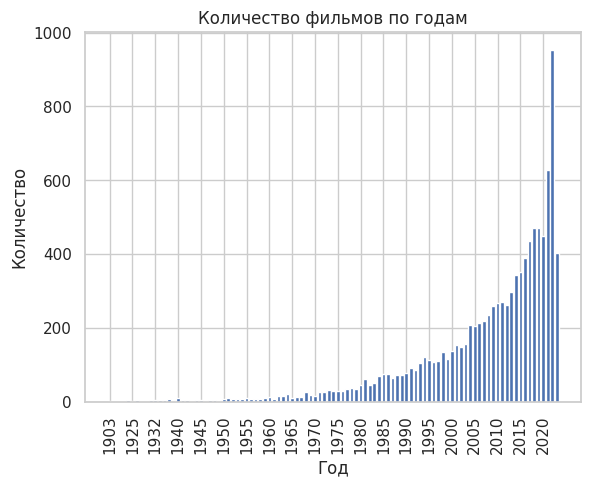

In [449]:
year_counts = df_movies['date_x'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Количество фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(year_counts.index[::5], rotation=90)
plt.show()

Вывод: из графика видно, что с каждым годом количество выпускаемых фильмов увеличивается. Это говорит о росте кинопроизводства в мире.






Text(0.5, 0, 'Оценка')

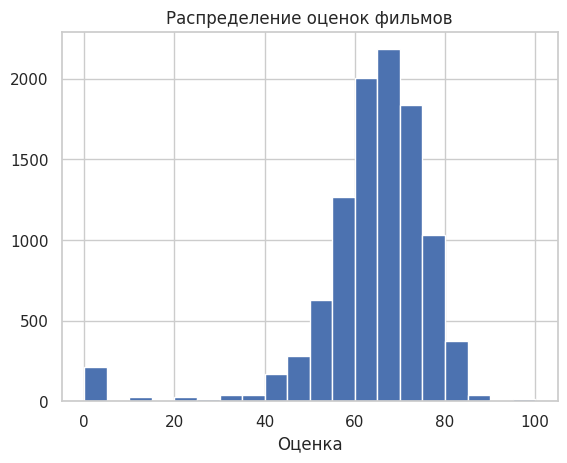

In [450]:
plt.hist(df_movies['score'], bins=20)
plt.title('Распределение оценок фильмов')
plt.xlabel('Оценка')

Исходя из описания графика, можно предположить, что распределение оценок фильмов похоже на нормальное распределение с пиком около значения 70 и симметричным "хвостом" влево и вправо. Построим матрицу корреляции между этими столбцами и выведем ее на экран:



In [451]:
corr_matrix = df_movies[columns].corr()
corr_matrix

,score,budget_x,revenue
score,1.000000,-0.23547,0.096533
budget_x,-0.235470,1.00000,0.673830
revenue,0.096533,0.67383,1.000000


<Axes: >

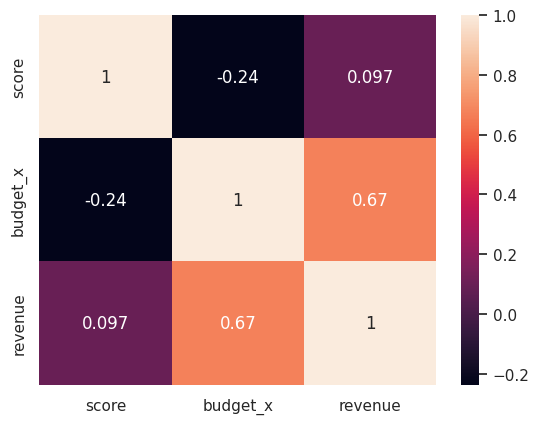

In [452]:
sns.heatmap(corr_matrix, annot = True)

Из таблицы корреляции видно, что между рейтингом фильма и бюджетом производства есть отрицательная корреляция, то есть чем выше рейтинг фильма, тем меньше обычно бюджет его производства. Однако между бюджетом производства и сборами фильма есть положительная корреляция, то есть чем больше бюджет у фильма, тем выше его сборы. Теперь построим диаграммы рассеяния для этих столбцов:

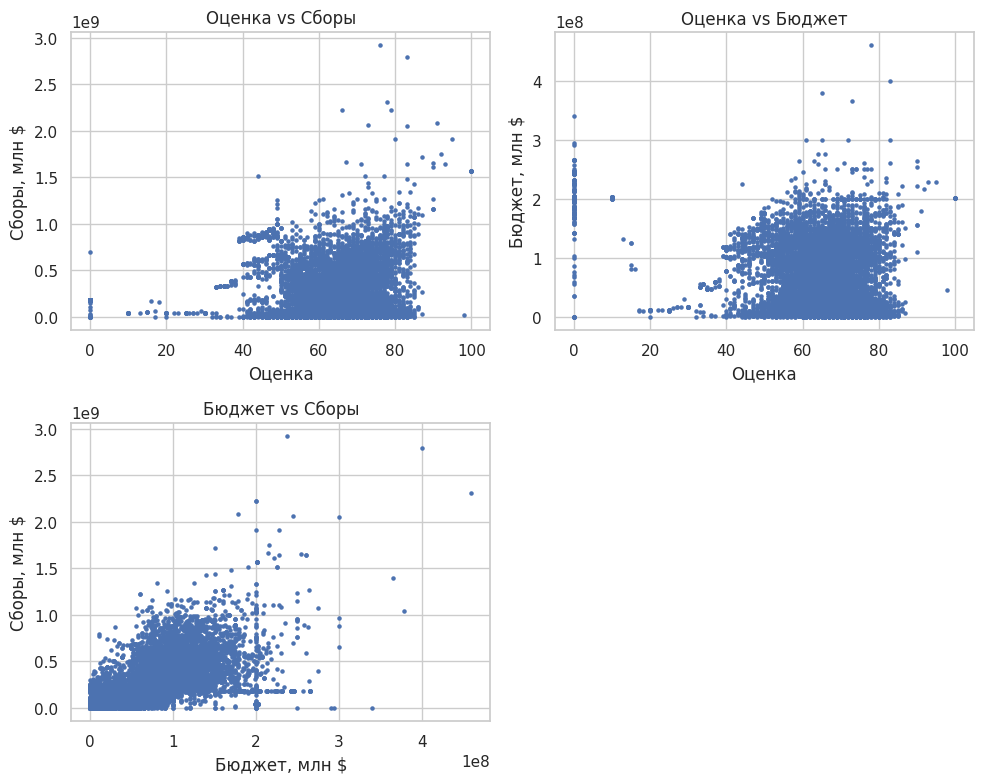

In [453]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0, 0].scatter(df_movies['score'], df_movies['revenue'], s=5)
axs[0, 0].set_title('Оценка vs Сборы')
axs[0, 0].set_xlabel('Оценка')
axs[0, 0].set_ylabel('Сборы, млн $')

axs[0, 1].scatter(df_movies['score'], df_movies['budget_x'], s=5)
axs[0, 1].set_title('Оценка vs Бюджет')
axs[0, 1].set_xlabel('Оценка')
axs[0, 1].set_ylabel('Бюджет, млн $')

axs[1, 0].scatter(df_movies['budget_x'], df_movies['revenue'], s=5)
axs[1, 0].set_title('Бюджет vs Сборы')
axs[1, 0].set_xlabel('Бюджет, млн $')
axs[1, 0].set_ylabel('Сборы, млн $')

fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


Проверим, какой жанр принес наибольшие доходы в разных странах и построим соответствующую визуализацию. Для этого нам нужно сгруппировать данные по странам и по каждой стране вычислить сумму доходов для каждого жанра. Затем мы можем выбрать жанр с наибольшей суммой доходов для каждой страны. Для красивого вывода построим график только для фильмов, у которых доход больше миллиарда

In [454]:
df_high_revenue = df_movies.query('revenue > 1000000000')
grouped = df_high_revenue.groupby('country')[list(genres_dict.keys()) + ['revenue']].sum()
grouped.head()

,Mystery,Horror,Science Fiction,War,Documentary,Western,Comedy,TV Movie,Animation,Adventure,Fantasy,Music,Romance,Thriller,Family,Drama,Action,History,Crime,revenue
country,,,,,,,,,,,,,,,,,,,,
AR,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.569324e+09
AU,2,0,25,1,1,1,12,3,21,44,24,2,6,12,23,14,39,0,7,8.950908e+10
ES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.075683e+09
FR,1,0,1,0,1,0,0,2,1,0,1,0,1,0,0,0,0,0,1,4.649804e+09
GB,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.157477e+09


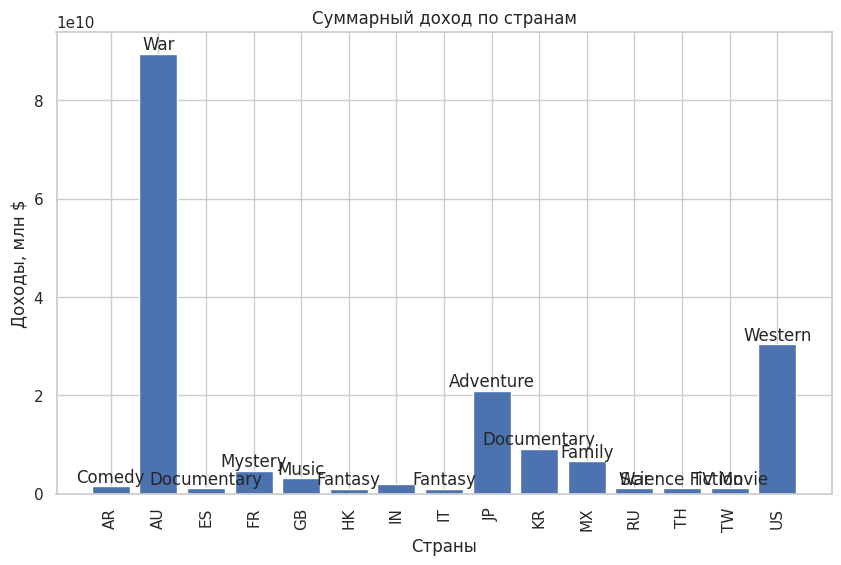

In [455]:
top_genres = []
for country in grouped.index:
    max_revenue = 0
    top_genre = ''
    for genre in genres_dict.keys():
        if grouped.loc[country, genre] == 1 and grouped.loc[country, 'revenue'] > max_revenue:
            max_revenue = grouped.loc[country, 'revenue']
            top_genre = genre
    top_genres.append(top_genre)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped.index, grouped['revenue'])
ax.set_title('Суммарный доход по странам')
ax.set_xlabel('Страны')
ax.set_ylabel('Доходы, млн $')
ax.tick_params(axis='x', labelrotation=90)
for i, genre in enumerate(top_genres):
    if genre != '':
        ax.text(i, grouped.loc[grouped.index[i], 'revenue'], genre, ha='center', va='bottom')
plt.show()